# __OPEN CV BASICS TUTORIAL__

__1. Reading, Showing and Wring using Open CV__

In [19]:
import numpy as np
import cv2
print(cv2.__version__)
import os
import datetime
#print(str(datetime.datetime.now()))

4.2.0


In [21]:
path='E:/opencv-master/opencv-master/samples/data'
##dataset from : https://github.com/opencv/opencv

In [23]:
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg',1) ##reading 0-gray, 1-color
cv2.imshow('image',img) ##showing
k=cv2.waitKey(0)
if k==27: ##press esc key to close all windows
    cv2.destroyAllWindows()
elif k==ord('s'): ## press s key to save and exit
    cv2.imwrite('lena_copy.png',img)
    print('image saved at')
    print(os.getcwd())
    cv2.waitKey(0)
    cv2.destroyAllWindows()

__1.b. Reading, Showing and Wring using Open CV and MATPLOT LIB__

<IPython.core.display.Javascript object>


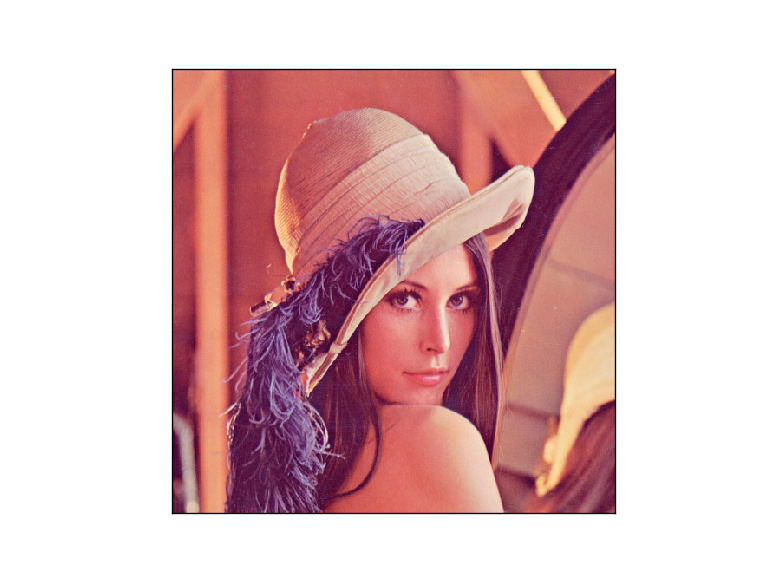

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ioff() ##prevents plots getting overwritten

img=cv2.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg',-1) ## opencv reads images in BGR format
#cv2.imshow('Image',img)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ## matplotlib shows images in RGB format
plt.imshow(img)
plt.xticks([]),plt.yticks([]) #to remove x and axis marks
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

__2. Using read, dispaly and save vedios using cameras__, __Changing properties of captured vedio__, __Putting text On the video__

In [25]:
cap= cv2.VideoCapture(0);
fourcc=cv2.VideoWriter_fourcc(*'XVID') ##codec
out=cv2.VideoWriter('output.avi', fourcc,20.0,(640,480)) ## filname, codec, frame size

cap.set(3,1208) ## changing the width of the frame
cap.set(4, 720) ## changing the height of the frame
    
print(cap.isOpened())

while (True): 
    ret, frame= cap.read() ##(ret-boolean variable check for frame)
    
    if ret== True:
    
        #print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        #print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
        out.write(frame)

        '''
        gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) ## to convert colored to gray scale
        cv2.imshow('frame', gray) ## gray '''
        text='Width:'+str(cap.get(3))+', Height:'+str(cap.get(4))+' '
        datet=str(datetime.datetime.now())
        font=cv2.FONT_HERSHEY_SIMPLEX
        frame=cv2.putText(frame, datet, (10,50), font, 1,(0,255,255), 2, cv2.LINE_AA) ##putting text on the vedio

        cv2.imshow('frame.avi', frame) ## color
        
        if cv2.waitKey(1)&0xFF==ord('q'): ## press q to exit
            print('Video saved at')
            print(os.getcwd())
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

True
Video saved at
C:\Users\alber


In [28]:
cap.release()
cv2.destroyAllWindows()
datetime.datetime.now()


datetime.datetime(2020, 6, 25, 21, 13, 25, 523065)

__3. Drawing Geometric Shapes__

In [29]:
#img=cv2.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg',1) ##reading 0-gray, 1-color
img=np.zeros([512, 512, 3], np.uint8)## numpy to create image
img=cv2.line(img, (0,0), (255,255), (255,0,0), 5) ## drawing line (image, (x1,y1), (x2,y2), (B,G,R colour), thickness)
img=cv2.arrowedLine(img, (0,255), (255,255), (147,96,44), 10)
img=cv2.rectangle(img, (384,0), (510,128), (0,0,255), -1)## thickness -1 to fill 
img=cv2.circle(img,(447,63), 63, (0,255,0), -1)
font=cv2.FONT_HERSHEY_SIMPLEX
img=cv2.putText(img, 'OpenCV', (10,500),font, 4,(0,255,255), 10, cv2.LINE_AA) ##putting 
cv2.imshow('image',img) ##showing
k=cv2.waitKey(0)
cv2.destroyAllWindows()

__4. Mouse Events  (Returns coordinates and colour of any point in a picture)__

In [5]:
events=[i for i in dir(cv2) if 'EVENT' in i] ##listing all events in cv2 library
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [39]:
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,' ',y)
        font=cv2.FONT_HERSHEY_SIMPLEX
        strXY=str(x)+' , '+str(y)
        cv2.putText(img, strXY, (x, y), font, 1, (255,255,0), 1) ## print x and y coordinates of position of left mouse click
        cv2.imshow('image', img)
    
    if event == cv2.EVENT_RBUTTONDOWN:
        blue=img [y, x, 0]
        red=img [y, x, 2]
        green=img [y, x, 1]
        font=cv2.FONT_HERSHEY_SIMPLEX
        strBGR=str(blue)+', '+str(green)+', '+str(red)
        cv2.putText(img, strBGR, (x, y), font, 1, (0,255,0), 2) ## prints color
        cv2.imshow('image', img) 
        
#img=np.zeros((512,512, 3), np.uint8) #returns balck picture
#img=cv2.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg',1)
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/messi5.jpg',1)
img
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

325   289
400   291
330   338
407   339


In [37]:
## joining points in a image
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y),3,(0,0,255),-1)
        points.append((x,y))
        if len(points)>=2:
            cv2.line(img, points[-1], points[-2], (255,0,0), 5) ##joining last and second last points
        cv2.imshow('image',img)
    
        
#img=np.zeros((512,512, 3), np.uint8) #returns black picture
#img=cv2.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg',1
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/messi5.jpg',1)
img
cv2.imshow('image', img)
points=[]
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

__5. Opening  a second window__

In [30]:
## joining points in a image
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue=img[x,y,0]
        green=img[x,y,1]
        red=img[x,y,2]
        cv2.circle(img, (x,y),3,(0,0,255),-1)
        
        cv2.imshow('image',img)
        mycolor=np.zeros([512, 512, 3], np.uint8)## numpy to create image
        mycolor[:]=[blue,green,red]
        cv2.imshow('color',mycolor)
        
#img=np.zeros((512,512, 3), np.uint8) #returns black picture
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg',1)
cv2.imshow('image', img)
points=[]
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

__6. Arithamatic operations on image__

In [35]:
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/messi5.jpg',1)
print(img.shape) ##tupple of rows, columns and channels
print(img.size) ##returns total no. of pixels
print(img.dtype)
b,g,r=cv2.split(img)
#cv2.imshow('blue',b)
img=cv2.merge((b,g,r))
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(342, 548, 3)
562248
uint8


__7. Copy, Paste ROI of Image__

In [4]:
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/messi5.jpg',1)
ball=img[280:340, 330:390] ##selecting the ROI(ball here)
img[273:333, 100:160]=ball ##pasting in new position
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

__8. Add 2 Image__

In [12]:
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/messi5.jpg',1)
img2=cv2.imread('E:/opencv-master/opencv-master/samples/data/opencv-logo.png',1)

'''re sizing both images to same size for adding'''
img=cv2.resize(img, (512,512))
img2=cv2.resize(img2, (512,512))

dst=cv2.add(img, img2);
dst2= cv2.addWeighted(img,0.9,img2,0.1,0)##weighted add formula: dst = src1*alpha + src2*beta + gamma;
cv2.imshow('image', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

__9. Performing Bitwise operation__

In [13]:
img1=np.zeros((250,500,3), np.uint8)
img1=cv2.rectangle(img1,(200,0),(300,100),(255,255,255),-1)#making a white rectangle
img2=np.zeros((250,500,3), np.uint8)
print(img2.shape)
img2=cv2.rectangle(img2,(250,0),(0,500),(255,255,255),-1)#making a white rectangle
img2=cv2.flip(img2,cv2.ROTATE_180)

bitOp=cv2.bitwise_and(img1,img2) ## logical AND operation, Black=0, White=1
#bitOp=cv2.bitwise_or(img1,img2) ## logical OR operation
#bitOp=cv2.bitwise_xor(img1,img2) ## logical XOR operation
#bitOp=cv2.bitwise_not(img1) ## logical NOT operation

cv2.imshow('image1', img1)
cv2.imshow('image2', img2)
cv2.imshow('image3', bitOp)
cv2.waitKey(0)
cv2.destroyAllWindows()

(250, 500, 3)


__10. Creating Trackbar (Example 1)__

In [4]:
'''4 taskbars: B;G;R taskbars and a switch'''

import cv2 as cv
import numpy as np

def nothing(x):
    pass
    
img=np.zeros((300,500,3), np.uint8)
cv.namedWindow('image')
cv.createTrackbar('B', 'image',0,255,nothing)
cv.createTrackbar('G', 'image',0,255,nothing)
cv.createTrackbar('R', 'image',0,255,nothing)

switch='0:OFF\n 1:ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k=cv.waitKey(1) & 0xFF
    if k== 27: ##press esc key to close all windows 
        break
    b=cv.getTrackbarPos('B','image')
    g=cv.getTrackbarPos('G','image')
    r=cv.getTrackbarPos('R','image')
    s=cv.getTrackbarPos(switch,'image')
    
    if s == 0:
        img[:]=0
    else:
        img[:]=[b,g,r]
        
cv.destroyAllWindows()

__10. Creating Trackbar (Example 2)__

In [5]:
'''2 taskbars: Number taskbars and a switch'''

import cv2 as cv
import numpy as np

def nothing(x):
    pass
    
#img=np.zeros((300,500,3), np.uint8)
cv.namedWindow('image')
cv.createTrackbar('CP', 'image', 10,400,nothing) #current position

switch='0:OFF\n 1:ON'
cv.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    img=cv.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg',1)
    pos=cv.getTrackbarPos('CP','image')
    font=cv.FONT_HERSHEY_SIMPLEX
    cv.putText(img, str(pos), (50,150), font, 4, (0,0,255))

    k=cv.waitKey(1) & 0xFF

    if k== 27: ##press esc key to close all windows 
        break
    
    s=cv.getTrackbarPos(switch,'image')
    
    if s == 0:
        pass
    else:
        img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    cv.imshow('image',img)
cv.destroyAllWindows()